# The Effect of Nationality on Tennis Play
### Matt DeMichiel and Kevin Lee

The goal of this project will be to investigate whether or not a player’s nationality influences their success on court given different conditions. For example, it is generally regarded that because of the lack of clay courts in the US, American players are not very good on this surface. However, the abundance of hard courts makes them serious at the US and Australian Open, where all matches are played on the asphalt. Across the Atlantic, Spanish players are known as masters of the clay court. In fact, one Spaniard, Rafael Nadal, has had so much success that he universally has been given the moniker of “The King of Clay.” Using the results of thousands of matches, we would like to examine these assumptions, as well as come up with new ideas as to how coming from a certain country influences someone’s playing style. Do certain nationalities tend to spend more time on court? Are certain players more likely to hit aces than others? Who is more at risk for committing unforced errors? Have these trends changed over time?

## Preliminaries

In [1]:
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for pandas 

%matplotlib inline                     

# check versions
print('Python version: ', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

Python version:  3.5.2 |Anaconda 4.1.1 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
Pandas version:  0.18.1
Today:  2016-12-20


## Collecting the Data
To look for and analyze these trends, we will be using work published by Jeff Sackmann, an author and entrepreneur in the sports statistics field. Jeff maintains a page on GitHub known as the “Match Charting Project,” in which he has recorded the results of tens of thousands of matches spanning over thirty years. These match results include data points such as court surface, amount of time on court, winner, loser, number of unforced errors, and many more. For the purposes of our research, we will only be examining the results of matches betwen 2013 and 2015. In addition, we will only be analyzing the results of players from **seven** countries. These countries are **USA, Japan, Spain, Argentina, Australia, Serbia, and France**. These countries give us a nice cross section of players from every continent.

In [2]:
url2013 = 'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2013.csv' # 2013 match data
url2014 = 'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2014.csv' # 2014 match data
url2015 = 'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2015.csv' # 2015 match data
# convert each csv file into data frames
df2013 = pd.read_csv(url2013)
df2014 = pd.read_csv(url2014)
df2015 = pd.read_csv(url2015)

In [3]:
# a look at the plentiful amount of data provided by Jeff Sackmann (each year has the same data)
df2013.columns


Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'winner_rank', 'winner_rank_points', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'loser_rank', 'loser_rank_points', 'score', 'best_of',
       'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced'],
      dtype='object')

Seeing as we are not examining every variable, our final dataframe that we will be working with will not include every column. The following code keeps only the variables we are interested in looking at. In addition, each dataframe includes countries other than what we are interested in looking at. Therefore, we create a variable `countries` which contains string of the country codes we are examining.

In [4]:
numlist=[1,2,5,10,11,12,13,14,15,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48]
atp2013 = df2013[numlist]
atp2014 = df2014[numlist]
atp2015 = df2015[numlist]
countries=['USA','FRA','ESP','SRB','JPN','AUS','ARG']

In [5]:
# create our final master dataframe which combines the dataframes for each year
atp = atp2013.append(atp2014).append(atp2015)
atp.head()

,tourney_name,surface,tourney_date,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,loser_name,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,Kitzbuhel,Clay,20130728,Leonardo Mayer,R,188.0,ARG,26.206708,78.0,Kenny De Schepper,...,0.0,3.0,4.0,78.0,45.0,30.0,16.0,10.0,10.0,12.0
1,Kitzbuhel,Clay,20130728,Horacio Zeballos,L,188.0,ARG,28.254620,54.0,Martin Fischer,...,16.0,4.0,2.0,81.0,44.0,30.0,21.0,14.0,5.0,9.0
2,Kitzbuhel,Clay,20130728,Marcel Granollers,R,190.0,ESP,27.296372,53.0,Mate Pavic,...,6.0,2.0,3.0,73.0,39.0,26.0,19.0,10.0,6.0,8.0
3,Kitzbuhel,Clay,20130728,Guillermo Garcia Lopez,R,188.0,ESP,30.151951,72.0,Thomaz Bellucci,...,15.0,9.0,3.0,116.0,62.0,38.0,27.0,16.0,6.0,12.0
4,Kitzbuhel,Clay,20130728,Robin Haase,R,190.0,NED,26.313484,68.0,Guillaume Rufin,...,6.0,2.0,7.0,88.0,48.0,32.0,15.0,11.0,7.0,11.0


Finally, we decided that in order to keep our research as controlled as possible, we removed Grand Slam matches, which are played best 3 out of 5 sets. Our final dataframe consists of the results of matches that were played best 2 out of 3.

In [7]:
atp= atp[atp['best_of'].isin([3])]

Now that we have our "Master DataFrame", we decided to look at nationality's effects on play based on a few different metrics:
    
    1) Length of Time of a Match
    2) Win Percentage per Surface
    3) Unforced Errors Committed Over Time

The challenge in this dataframe is that for each match, there is a winner and a loser. This means that a lot of the data manipulation involves tracking the players both in the wins and the losses column.

## Length of Time
Because Europeans play on clay on courts for all of their junior careers, their games are more suited to this surface. Since clay is a slow surface, one would anticipate that a European player would play longer matches. The same goes for Americans. Hard courts, which are notoriously fast, are the predominant surface in the US. This means American players are used to short points, so one would expect the overall match would be shorter.

In [8]:
 # get average length of time for matches that a country won
g = atp[['winner_ioc','minutes']].groupby('winner_ioc')
gm=g.mean()
minW=minW= gm.loc[countries] #pull average match length for countries we want to examine

# because there is a winner_ioc and a loser_ioc, we have to rename the index to countries in order combine the dataframes
minW.index.name='Country'
minW

,minutes
Country,
USA,92.684848
FRA,91.388489
ESP,97.551601
SRB,94.032787
JPN,96.401869
AUS,93.511628
ARG,99.451505


In [9]:
# now we do the same for the matches that the countries lost
l = atp[['loser_ioc','minutes']].groupby('loser_ioc')
gl=l.mean()
minL= gl.loc[countries]
minL.index.name='Country'
minL

,minutes
Country,
USA,91.939474
FRA,93.676208
ESP,99.770167
SRB,96.153153
JPN,85.294872
AUS,94.548837
ARG,100.454225


In [10]:
# Combine the average won and lost time to a total average
minL['minutesW']=minW['minutes']
minL['Average']= (minL['minutes']+minL['minutesW'])/2
minL

,minutes,minutesW,Average
Country,,,
USA,91.939474,92.684848,92.312161
FRA,93.676208,91.388489,92.532348
ESP,99.770167,97.551601,98.660884
SRB,96.153153,94.032787,95.092970
JPN,85.294872,96.401869,90.848370
AUS,94.548837,93.511628,94.030233
ARG,100.454225,99.451505,99.952865


We are only interested in the Average column, as that is the average time for **all** matches, so that is the one we used to create our graph.

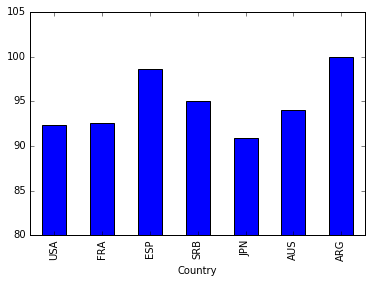

In [11]:
minL['Average'].plot(kind='bar',
                    ylim= (80,105))

This graph supports the popular consensus people have about players from certain countries. Spanish players are known as the clay court masters who play incredibly long points. As this graph shows, Spanish players play longer matches on average than every other country expect for Argentina, a country also known for its clay court play. The United States, as to be expected, plays among the shortest matches on average, only behind Japan, a country where hard courts are the predominant surface.

## Win Percentage per Surface
As certain players grow up on certain surfaces, it is to be expected that this would be reflected in their win percentages. Our next analysis examines just that. To manipulate the data so that we can graph the win percentages by surfaces for each country, we had to count how many times the player's country showed up in the wins column and loss column, and then compute their win percentage.

In [12]:
w = atp[['winner_ioc','surface']].groupby(['surface']) # group the results by surface

In [13]:
# count of how many times each country shows up in the wins column and turn into a dataframe
t= w.winner_ioc.value_counts()
tt=pd.DataFrame(t)

In [14]:
tt.head()

winner_ioc
surface winner_ioc            
Clay    ESP                533
        ARG                209
        FRA                154
        ITA                129
        GER                121

In [15]:
# move surface out of the index to look at a country's wins per surface
tt=tt.unstack(level='surface')
tt.head()

winner_ioc             
surface          Clay Grass   Hard
winner_ioc                        
ALG               2.0   NaN    1.0
ARG             209.0   7.0  109.0
AUS              20.0  40.0  160.0
AUT              65.0   7.0   49.0
BAR               1.0   NaN    1.0

In [16]:
tt=tt.loc[countries] # pull out countries we are examining
tt.columns=['Clay Wins', 'Grass Wins', 'Hard Wins']
tt.index.rename('Country', inplace=True) # changing winner_ioc to country allows us to add losses to the dataframe in a coherent way
tt=tt.reset_index() # in order to merge the data on country, it must not be in the index
tt

,Country,Clay Wins,Grass Wins,Hard Wins
0,USA,52.0,54.0,321.0
1,FRA,154.0,79.0,451.0
2,ESP,533.0,43.0,412.0
3,SRB,68.0,7.0,160.0
4,JPN,28.0,11.0,101.0
5,AUS,20.0,40.0,160.0
6,ARG,209.0,7.0,109.0


In [17]:
# compute losses by surface per country
l= atp[['loser_ioc','surface']].groupby(['surface'])

In [18]:
x= l.loser_ioc.value_counts()
xx=pd.DataFrame(x)
xx=xx.unstack(level='surface')
xx=xx.loc[countries]
xx.index.rename('Country', inplace=True)
xx.columns=['Clay Losses', 'Grass Losses', 'Hard Losses']
xx=xx.reset_index()
xx

,Country,Clay Losses,Grass Losses,Hard Losses
0,USA,60.0,63.0,346.0
1,FRA,175.0,64.0,424.0
2,ESP,381.0,38.0,367.0
3,SRB,53.0,7.0,78.0
4,JPN,14.0,10.0,87.0
5,AUS,45.0,32.0,190.0
6,ARG,192.0,14.0,109.0


In [19]:
wl = pd.merge(tt,xx,
             how= 'right',
             on= 'Country') #merge the two dataframes
wl=wl.set_index('Country')
wl

,Clay Wins,Grass Wins,Hard Wins,Clay Losses,Grass Losses,Hard Losses
Country,,,,,,
USA,52.0,54.0,321.0,60.0,63.0,346.0
FRA,154.0,79.0,451.0,175.0,64.0,424.0
ESP,533.0,43.0,412.0,381.0,38.0,367.0
SRB,68.0,7.0,160.0,53.0,7.0,78.0
JPN,28.0,11.0,101.0,14.0,10.0,87.0
AUS,20.0,40.0,160.0,45.0,32.0,190.0
ARG,209.0,7.0,109.0,192.0,14.0,109.0


Now that we have the wins and losses by surface for each country, we can make a new dataframe that has the win percentage by surface by country. A `for` loop makes this simple.

In [20]:
surfaces=['Clay','Grass','Hard']
for surface in surfaces:
    wl[surface+' Win%']= wl[surface+' Wins']/(wl[surface+' Wins']+ wl[surface+' Losses'])
wl=wl[['Clay Win%','Grass Win%','Hard Win%']]
wl

,Clay Win%,Grass Win%,Hard Win%
Country,,,
USA,0.464286,0.461538,0.481259
FRA,0.468085,0.552448,0.515429
ESP,0.583151,0.530864,0.528883
SRB,0.561983,0.500000,0.672269
JPN,0.666667,0.523810,0.537234
AUS,0.307692,0.555556,0.457143
ARG,0.521197,0.333333,0.500000


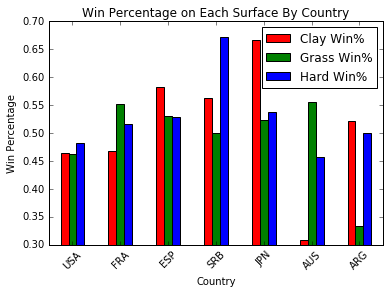

In [21]:
fig, ax= plt.subplots()
wl.plot(ax=ax,
        kind='bar',
        color=['red','green','blue'],
        title= 'Win Percentage on Each Surface By Country')
ax.legend(loc=0)
ax.set_ylabel('Win Percentage')
ax.set_ylim(0.3,0.7)
ax.set_xticklabels( countries, rotation=45 )

Again, this graph supports certain popular opinions. Americans have a higher win percentage on hard courts than grass and clay. Spanish players are incredibly successful on clay courts. Australians, also known for their hard court play, have an incredibly poor record on clay, but do well on grass, a fast surface. Serbians seem to have a very high win percentage overall. However, that number is most likely skewed, as Serbian Novak Djokovic, the number 1 player in the world, is known to dominate his competition, pushing SRB's win percentage higher than normal. 

## Unforced Errors Over Time
One could assume that a consequence of playing shorter points would be more unforced errors are made as time goes on. However, unforced errors are not one of the variables that Jeff Sackmann provides in his dataset. We decided to use double faults, an unforced error of the serve, as a proxy. The hypothesis for this metric is that the longer a hard court player (American, Australian, Japanese) goes into a match, the more errors he makes, and vice versa for clay court players. Therefore, if we were to plot the length of the match in the x axis and number of doubles faults on the y axis, we would expect that the trend line would be steeper for hard court players than clay court players.

In [23]:
df= atp[['winner_ioc','w_df','loser_ioc','l_df','minutes']] #dataframe of only the variables we are looking at
df.head()

,winner_ioc,w_df,loser_ioc,l_df,minutes
0,ARG,1.0,FRA,4.0,84.0
1,ARG,1.0,AUT,2.0,125.0
2,ESP,3.0,CRO,3.0,115.0
3,ESP,12.0,BRA,3.0,171.0
4,NED,0.0,FRA,7.0,110.0


In [27]:
# For matches in which players lost, how many double faults were the for the length of the match
dfl = df[['loser_ioc','l_df','minutes']]
dfl=dfl.set_index('loser_ioc')
dfl=dfl.loc[countries]
dfl.dropna(inplace=True)
# rename columns to make it simpler to combine dataframes
dfl.index.names= ['ioc']
dfl=dfl.rename(columns={'l_df':'df'})
dfl.head()

,df,minutes
ioc,,
USA,1.0,92.0
USA,3.0,92.0
USA,0.0,65.0
USA,4.0,100.0
USA,2.0,114.0


In [29]:
# the same for matche in which the player won
dfw= df[['winner_ioc','w_df','minutes']]
dfw=dfw.set_index('winner_ioc')
dfw=dfw.loc[countries]
dfw.dropna(inplace=True)
# rename columns and index to make it easier to combine data
dfw.index.names= ['ioc']
dfw=dfw.rename(columns={'w_df':'df'})
dfw.head()

,df,minutes
ioc,,
USA,3.0,114.0
USA,0.0,62.0
USA,3.0,74.0
USA,3.0,83.0
USA,2.0,80.0


In [32]:
#combine dataframes
dfs= dfw.append(dfl)
dfs.head()

,df,minutes
ioc,,
USA,3.0,114.0
USA,0.0,62.0
USA,3.0,74.0
USA,3.0,83.0
USA,2.0,80.0


In [33]:
# combine data and organize it by country by length of match
dfs=dfs.reset_index()
dfs=dfs.set_index(['ioc','minutes'])
dfs=dfs.sort_index()
dfs.head()

df
ioc minutes     
ARG 10.0     0.0
    11.0     0.0
    11.0     0.0
    19.0     2.0
    22.0     0.0

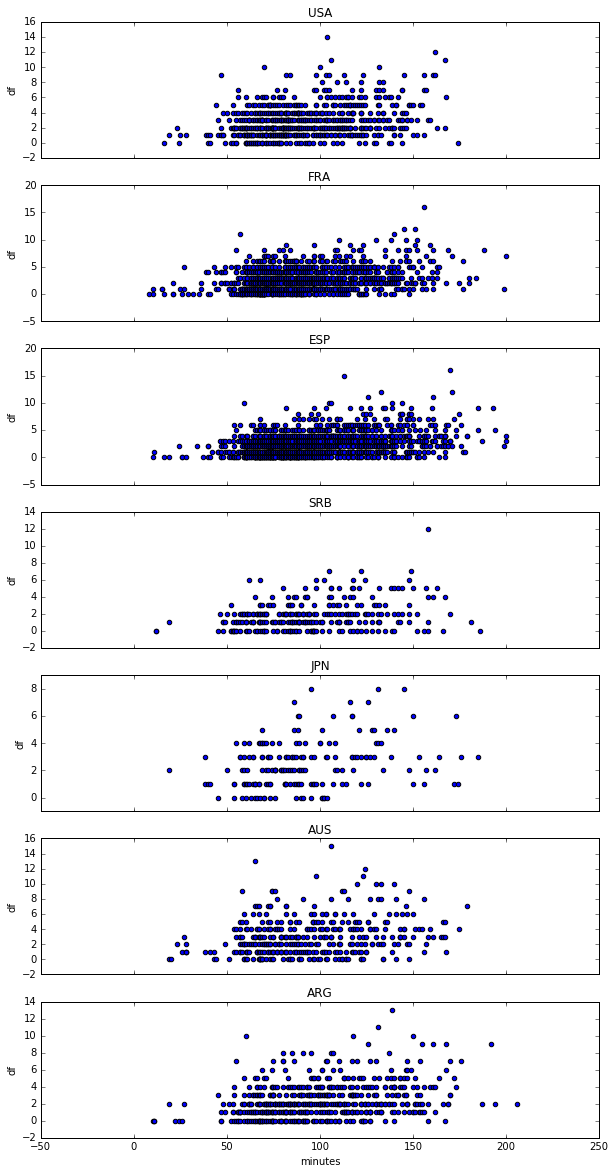

In [62]:
fig, ax= plt.subplots(7, figsize=(10,20), sharex=True)
for country in countries:
    dfs.xs(country).reset_index(level=1).plot.scatter('minutes','df', ax= ax[countries.index(country)],
                                                     title=country, )
    

Examining these scatter plots reveals that there is no significant correlation between minutes played and number of unforced errors. This is likely due to the fact that best of 3 set matches are relatively short, so players are not likely to get tired in a 2 out of 3 set match. It is also possible that number of double faults is not an accurate proxy for unforced errors.